<a href="https://colab.research.google.com/github/mdhasanali28680/Rice-Leaf/blob/main/resnet_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#LOAD DEPENDENCIES
import os
import cv2
import time
import pickle
import logging
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Evaluation libraries
import itertools
import scikitplot
import matplotlib.patheffects as path_effects
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score

#Model loader libraries
from pickle import load
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import Model, layers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#PREVENT ERROR UNCESSARY MESSAGES
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
#LOAD THE DATA
train_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/stage_1/train"
validation_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/stage_1/validation"
test_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/test/stage-1/test"

img_rows, img_cols = 224, 224
input_shape = (img_rows,img_cols,3)
model_input = Input(shape=input_shape)

print("Data folders found!")
print("The Input size is set to ", model_input)

Data folders found!
The Input size is set to  KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [ ]:
#HYPER-PARAMETERS USED NO NEED TO CHANGE. MAKE SURE IT MATCHES WITH YOUR TRAINED MODEL.
#THIS IS MAINLY FOR PLOTTING PURPOSES ONLY

batch_size = 32

epochs = 25

print("Batch Size is set to:", batch_size)
print("Epoch is set to:", epochs)
print()
print("Make sure it matches with your trained model before proceeding to prevent problems")

Batch Size is set to: 32
Epoch is set to: 25

Make sure it matches with your trained model before proceeding to prevent problems


In [ ]:

#DATA GENERATORS
val_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['0_Healthy', '1_Unhealthy'])

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['0_Healthy', '1_Unhealthy'])

#CHECK  THE NUMBER OF SAMPLES
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)

print("Validation samples:", nb_validation_samples)
print("Test samples:", nb_test_samples)

if nb_validation_samples == 0:
    print("NO DATA VALIDATION FOUND! Please check your validation data path and folders!")
    print("Check the data folders first!")
else:
    print("Validation samples found!")

if nb_test_samples == 0:
    print("NO DATA TEST FOUND! Please check your test data path and folders!")
    print("Check the data folders first!")
else:
    print("Test samples found!")

#check the class indices
validation_generator.class_indices
test_generator.class_indices

#true labels
Y_test=validation_generator.classes
test_labels = test_generator.classes

num_classes= len(validation_generator.class_indices)

print('Model set to train', num_classes, 'classes')

if nb_validation_samples and nb_test_samples > 0:
    print("Generators are set!")
    print("Check if dataset is complete and has no problems before proceeding.")

Found 933 images belonging to 2 classes.
Found 468 images belonging to 2 classes.
Validation samples: 933
Test samples: 468
Validation samples found!
Test samples found!
Model set to train 2 classes
Generators are set!
Check if dataset is complete and has no problems before proceeding.


In [ ]:
#LOAD THE TRAINED MODEL

model = load_model("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/stage-1/weights/resnet50v2_model.h5")
print("resnet50v2 INITIALIZED!")
print("The model consist of ", len(model.layers), "layers")

resnet50v2 INITIALIZED!
The model consist of  388 layers


In [ ]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1structurestructure (Inp  [(None, 224, 224, 3  0          []                               
 utLayer)                       )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1structurestructure[0][0]
                                                                 ']                               
                                                                                                  
 conv1_padstructure (ZeroPaddin  (None, 230, 230, 3)  0          ['input_1structurestructure[0][0]
 g2D)                                                            ']                      

In [ ]:
#VISUAL CUSTOMIZER

marker_t = '^'
marker_v = '+'
market_t_loss = 'v'
market_v_loss = 'x'
markersize = 5
fillstyle_t = 'none'
fillstyle_v = 'none'

color_t = 'blue'
color_v = 'orange'

labelsize = 10

color_t_loss = 'green'
color_v_loss = 'red'

border_pad = 0.5
legend_font_size = 9

ls_t = '-'
ls_v = '--'
lw_t = '1.5'
lw_v = '1.5'

print("You may change the values if needed for the ease of your evaluation")

You may change the values if needed for the ease of your evaluation


In [ ]:
# Test Results

#evaluate accuracy
test_pred = model.predict(test_generator,
                                 nb_test_samples/batch_size, workers=1)

test_accuracy = accuracy_score(test_labels, test_pred.argmax(axis=-1))
print('The accuracy of the model is: ', test_accuracy)

#evaluate mean squared error
test_mse = mean_squared_error(test_labels, test_pred.argmax(axis=-1))
print('The Mean Squared Error of the model is: ', test_mse)

#evaluate mean squared log error
test_msle = mean_squared_log_error(test_labels, test_pred.argmax(axis=-1))
print('The Mean Squared Log Error of the model is: ', test_msle)

15/15 [==============================] - 259s 17s/step
The accuracy of the model is:  0.9764957264957265
The Mean Squared Error of the model is:  0.023504273504273504
The Mean Squared Log Error of the model is:  0.011292699045085931


In [ ]:
import itertools
from sklearn.metrics import accuracy_score
from keras.models import load_model
from keras import applications
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import matplotlib.patheffects as path_effects

In [ ]:
#PRINTS THE ACCURACY GROWTH

N = epochs
plt.style.use("default")
plt.figure(figsize=(1.15*3,1.15*3), dpi=300, edgecolor='black', facecolor='white', linewidth=0)
plt.tight_layout()

plt.gcf().subplots_adjust(bottom=0.15)

plt.rc('xtick',labelsize=labelsize, direction="in" )
plt.rc('ytick', labelsize=labelsize, direction="in")
plt.tick_params(length=4, right=True, top=True)

plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="lower right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-1/figures/1-accuracy.jpg", bbox_inches='tight', dpi=600)

In [ ]:
#PRINTS THE DECREASE OF LOSS

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-1/figures/2-loss.png")

In [ ]:
#PRINTS BOTH ACCURACY AND LOSS IN ONE GRAPH

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-1/figures/3-convergence.png")

In [ ]:
v

In [ ]:
#EVALUATION FOR THE resnet50v2

#evaluate accuracy
y_pred = model.predict_generator(validation_generator,
                                               nb_validation_samples/batch_size, workers=1)
accuracy = accuracy_score(Y_test,y_pred.argmax(axis=-1))
print('The accuracy of the resnet50v2 model is: ', accuracy)

#evaluate mean squared error
mse = mean_squared_error(Y_test,y_pred.argmax(axis=-1))
print('The Mean Squared Error of the resnet50v2 model is: ', mse)

#evaluate mean squared log error
msle = mean_squared_log_error(Y_test,y_pred.argmax(axis=-1))
print('The Mean Squared Log Error of the resnet50v2 model is: ', msle)

<ipython-input-14-f22b5c632da5>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator,


The accuracy of the resnet50v2 model is:  0.969989281886388
The Mean Squared Error of the resnet50v2 model is:  0.030010718113612004
The Mean Squared Log Error of the resnet50v2 model is:  0.014418739967534447


              precision    recall  f1-score   support

   0_Healthy     0.9615    0.9677    0.9646       155
 1_Unhealthy     0.9840    0.9808    0.9824       313

    accuracy                         0.9765       468
   macro avg     0.9728    0.9743    0.9735       468
weighted avg     0.9765    0.9765    0.9765       468

Confusion matrix, without normalization
[[150   5]
 [  6 307]]


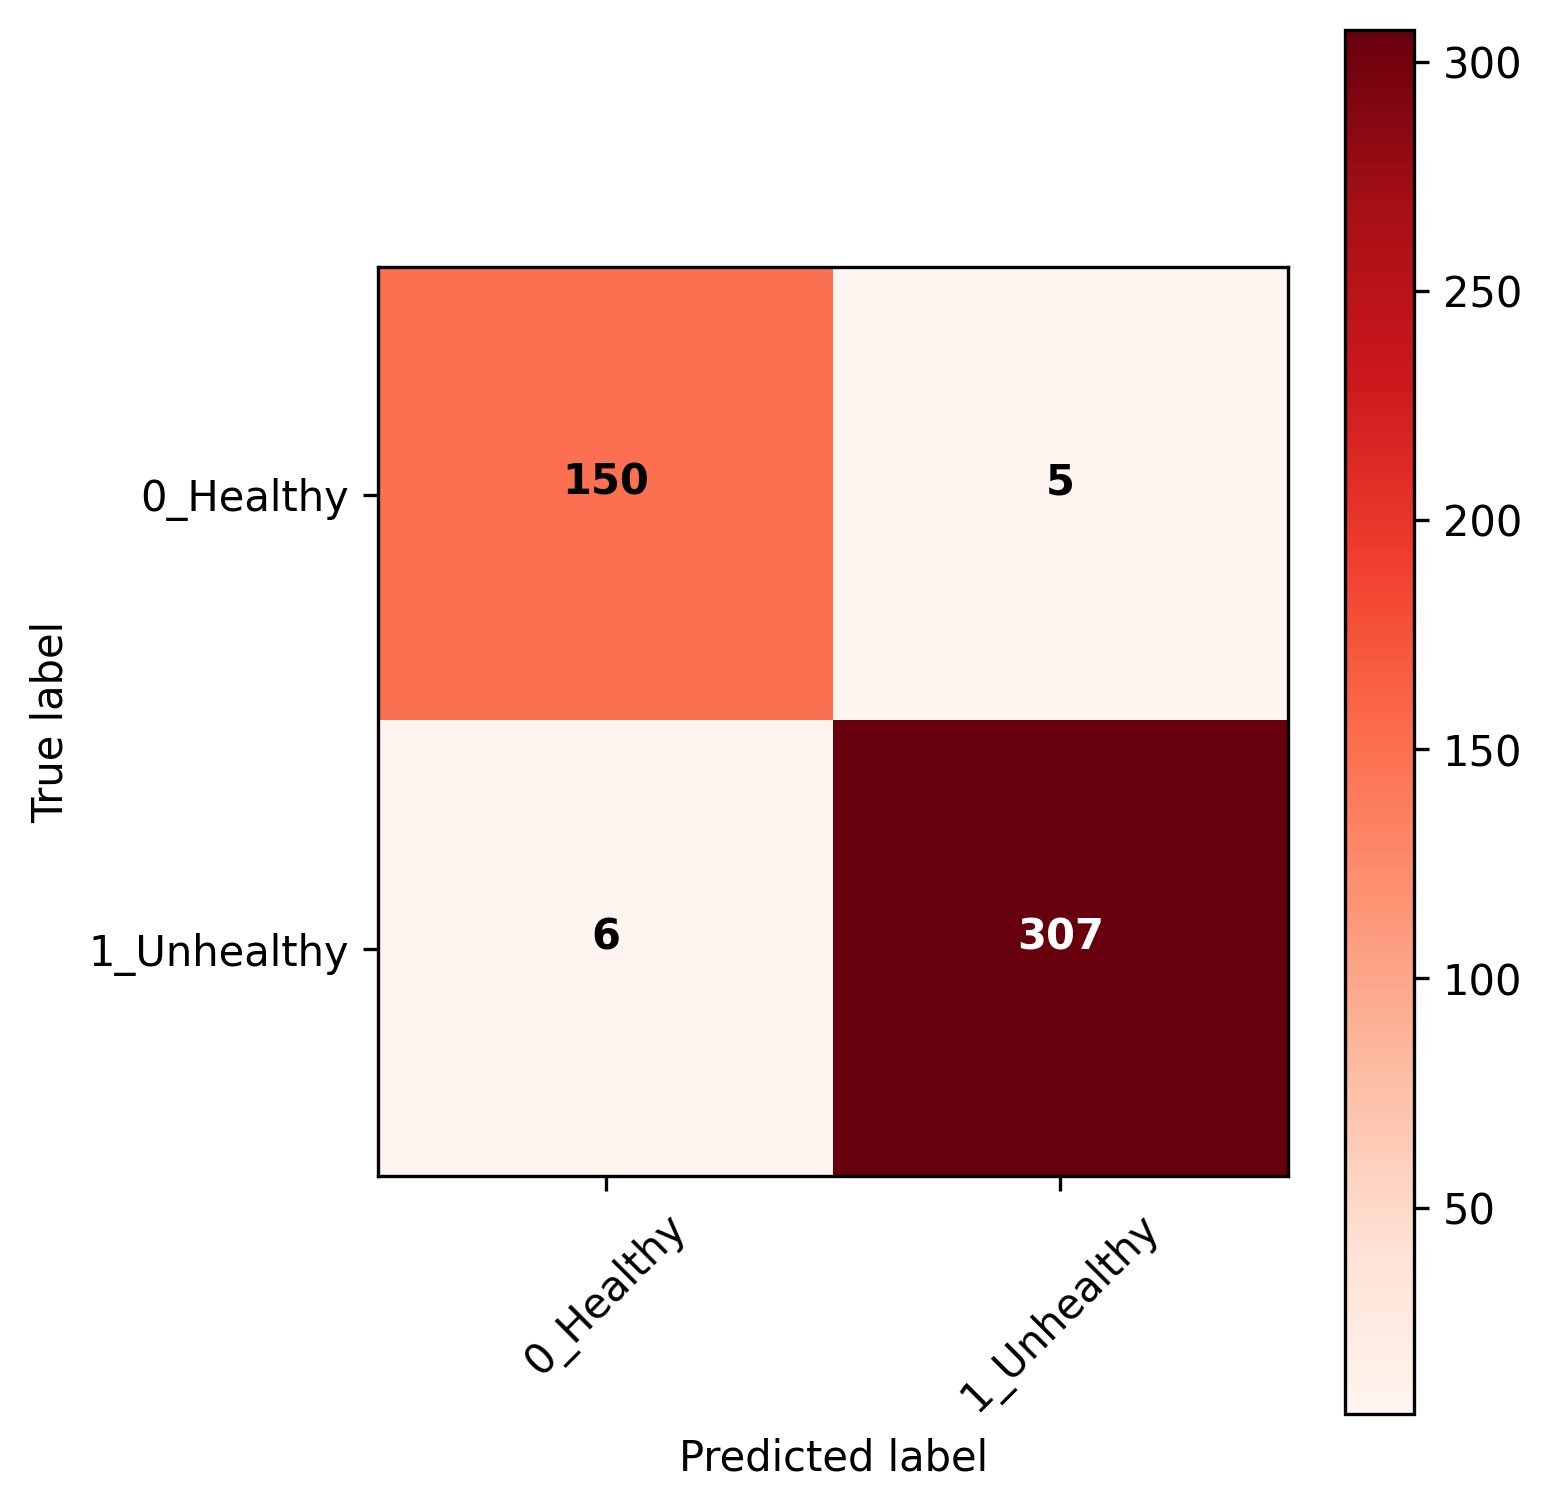

In [ ]:
# CONFUSION MATRIX

def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['0_Healthy', '1_Unhealthy']
print(classification_report(test_labels,test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-1/confusion_matrix.png", dpi=600)
plt.show()

              precision    recall  f1-score   support

   0_Healthy     0.9615    0.9677    0.9646       155
 1_Unhealthy     0.9840    0.9808    0.9824       313

    accuracy                         0.9765       468
   macro avg     0.9728    0.9743    0.9735       468
weighted avg     0.9765    0.9765    0.9765       468

Normalized confusion matrix
[[0.9677 0.0323]
 [0.0192 0.9808]]


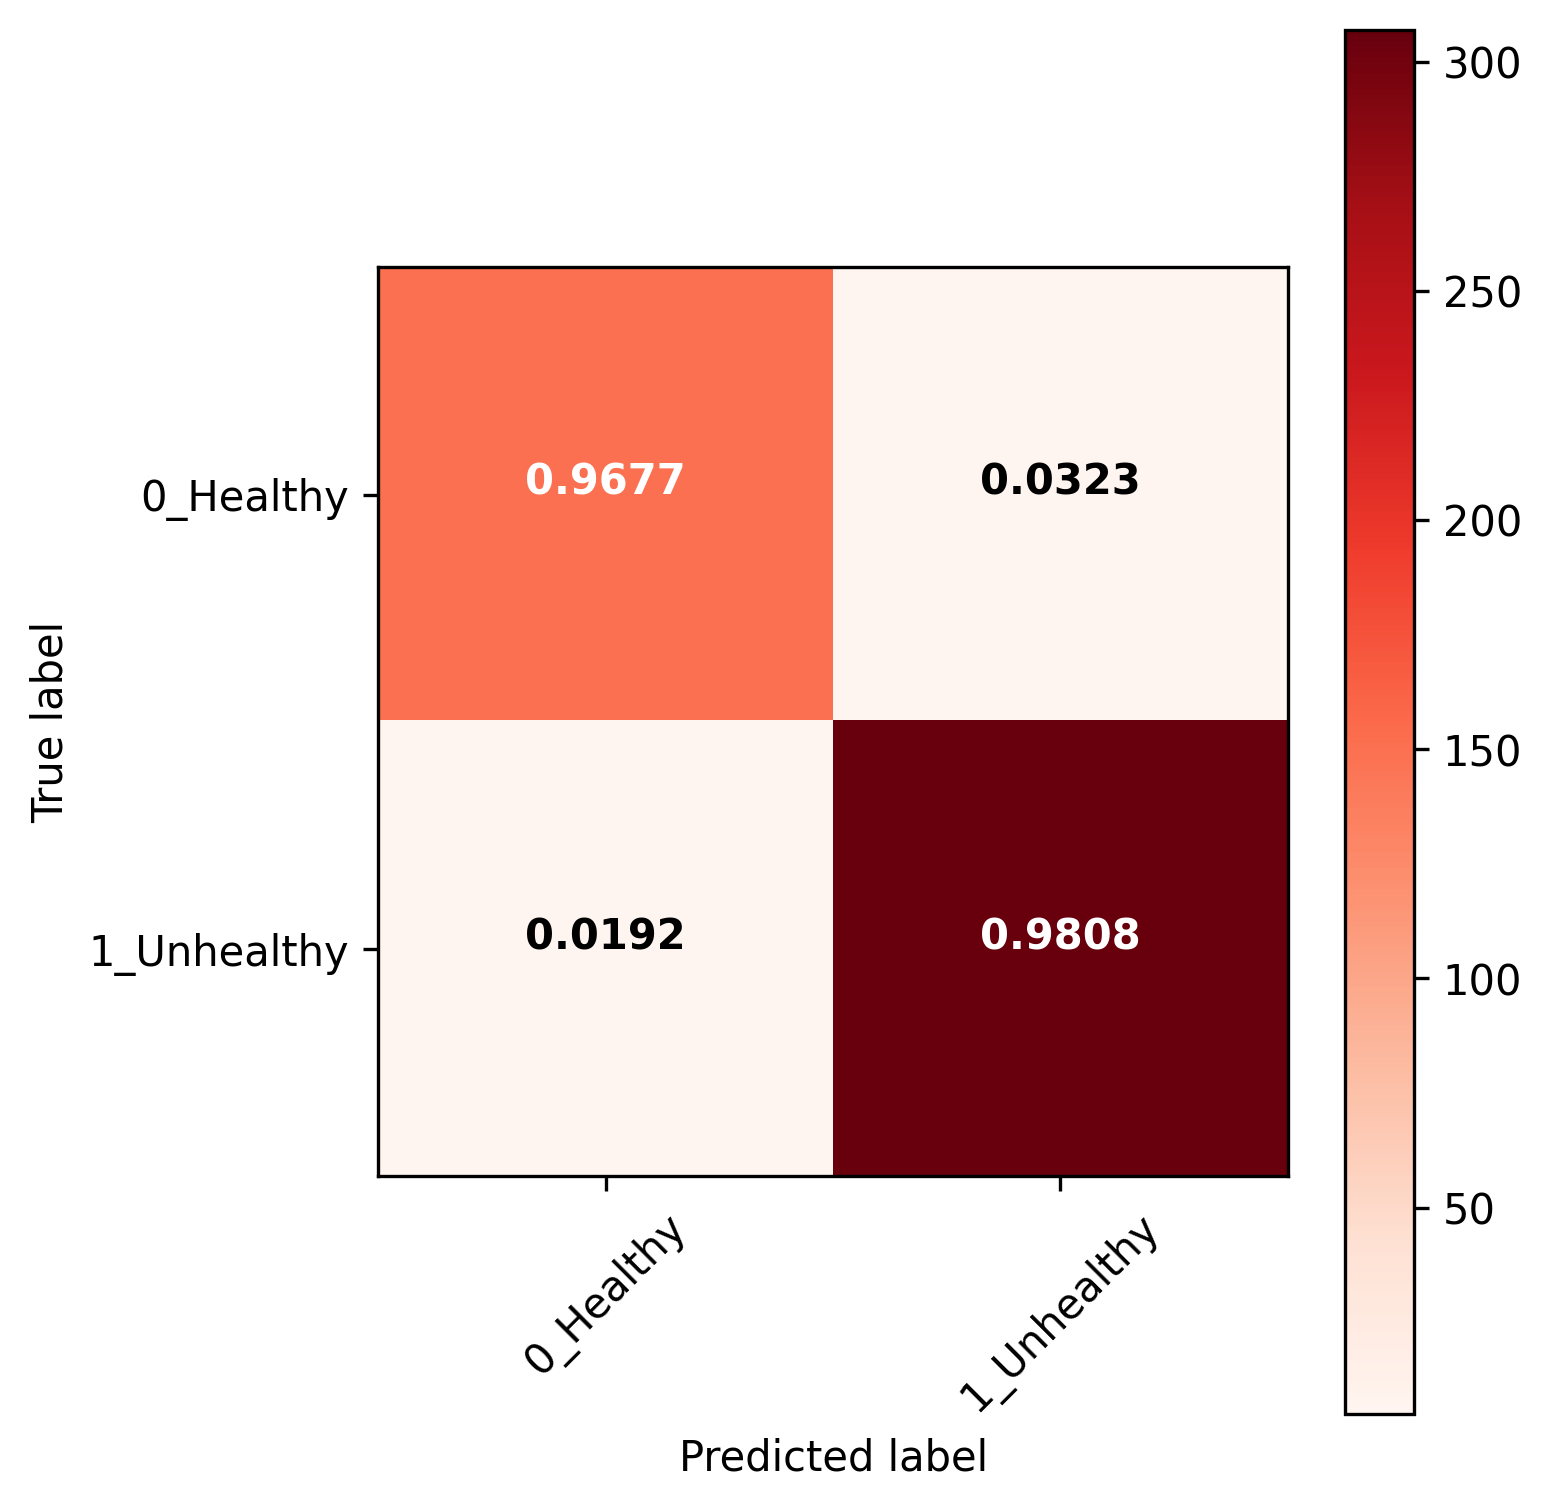

In [ ]:
# custom function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.4f'), weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['0_Healthy', '1_Unhealthy']
print(classification_report(test_labels,test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-1/confusion_matrix-normalized.png", dpi=600)
plt.show()

15/15 [==============================] - 211s 14s/step


<Figure size 2400x2400 with 0 Axes>

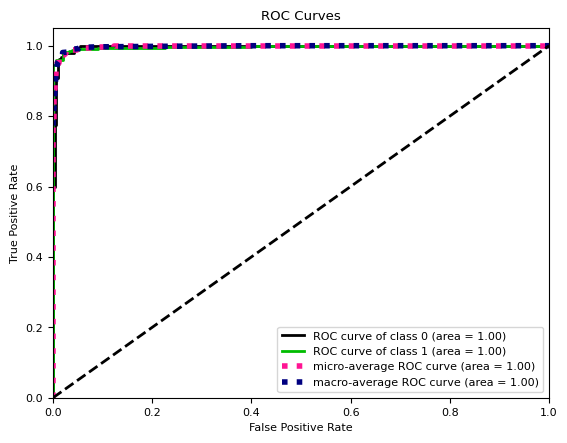

In [ ]:
#PRINT THE ROC CURVE

plt.figure(figsize=(8,8), dpi=300)
plt.rcParams.update({'font.size': 8})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_roc(test_labels, test_pred)
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-1/ROC_curve.png", dpi=600)
plt.show()

15/15 [==============================] - 199s 13s/step


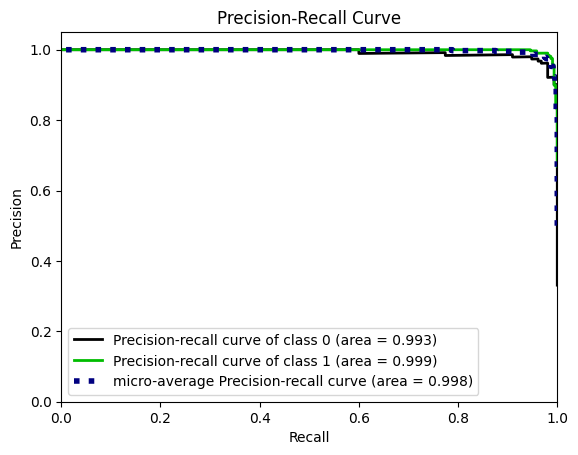

<Figure size 6000x6000 with 0 Axes>

In [ ]:
#PRINT THE P-R CURVE

plt.rcParams.update({'font.size': 10})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_precision_recall(test_labels, test_pred)
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-1/PR_curve.png", dpi=600)
plt.figure(figsize=(20, 20), dpi=300)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


stage-2


In [ ]:
#LOAD THE DATA
#LOAD THE DATA
train_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/stage_2/train"
validation_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/stage_2/validation"
test_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/test/stage-2/test"


# THE INPUT LAYER IS THE SAME AS IT WILL BE FUSED AS ONE LATER ON
img_rows, img_cols = 224, 224
input_shape = (img_rows,img_cols,3)
model_input = Input(shape=input_shape)
print("Data folders found!")
print("The Input size is set to ", model_input)

Data folders found!
The Input size is set to  KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
#HYPER-PARAMETERS USED NO NEED TO CHANGE. MAKE SURE IT MATCHES WITH YOUR TRAINED MODEL.
#THIS IS MAINLY FOR PLOTTING PURPOSES ONLY

batch_size = 32

epochs = 25

print("Batch Size is set to:", batch_size)
print("Epoch is set to:", epochs)
print()
print("Make sure it matches with your trained model before proceeding to prevent problems")

Batch Size is set to: 32
Epoch is set to: 25

Make sure it matches with your trained model before proceeding to prevent problems


In [ ]:

#DATA GENERATORS
val_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['0_Rust', '1_Brown_Spots', '2_Sooty_Molds'])

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['0_Rust', '1_Brown_Spots', '2_Sooty_Molds'])

#CHECK  THE NUMBER OF SAMPLES
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)

print("Validation samples:", nb_validation_samples)
print("Test samples:", nb_test_samples)

if nb_validation_samples == 0:
    print("NO DATA VALIDATION FOUND! Please check your validation data path and folders!")
    print("Check the data folders first!")
else:
    print("Validation samples found!")

if nb_test_samples == 0:
    print("NO DATA TEST FOUND! Please check your test data path and folders!")
    print("Check the data folders first!")
else:
    print("Test samples found!")

#check the class indices
validation_generator.class_indices
test_generator.class_indices

#true labels
Y_test=validation_generator.classes
test_labels = test_generator.classes

num_classes= len(validation_generator.class_indices)

print('Model set to train', num_classes, 'classes')

if nb_validation_samples and nb_test_samples > 0:
    print("Generators are set!")
    print("Check if dataset is complete and has no problems before proceeding.")

Found 625 images belonging to 3 classes.
Found 311 images belonging to 3 classes.
Validation samples: 625
Test samples: 311
Validation samples found!
Test samples found!
Model set to train 3 classes
Generators are set!
Check if dataset is complete and has no problems before proceeding.


In [ ]:
#LOAD THE TRAINED MODEL

model = load_model("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/stage-2/weights/resnet50v2_model.h5")
print("resnet50v2 INITIALIZED!")
print("The model consist of ", len(model.layers), "layers")

resnet50v2 INITIALIZED!
The model consist of  388 layers


In [ ]:
import pickle

In [ ]:
#LOAD THE TRAINED MODEL USING  THE model_trainer.ipynb

history = load(open('/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/stage-2/history/resnet50v2_model.pkl', 'rb'))
model = load_model('/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/stage-2/weights/resnet50v2_model.h5')

model._name="resnet50v2"
model.summary()

if len(model.layers) == 388  :
    print("MODEL IS READY!")
elif len(model.layers) != 388  :
    print("INCORRECT MODEL!")

print("resnet50v2 MODEL SUCCESSFULLY LOADED!")

In [ ]:
#VISUAL CUSTOMIZER

marker_t = '^'
marker_v = '+'
market_t_loss = 'v'
market_v_loss = 'x'
markersize = 5
fillstyle_t = 'none'
fillstyle_v = 'none'

color_t = 'blue'
color_v = 'orange'

labelsize = 10

color_t_loss = 'green'
color_v_loss = 'red'

border_pad = 0.5
legend_font_size = 9

ls_t = '-'
ls_v = '--'
lw_t = '1.5'
lw_v = '1.5'

print("You may change the values if needed for the ease of your evaluation")

You may change the values if needed for the ease of your evaluation


In [ ]:
#PRINTS THE ACCURACY GROWTH

N = epochs
plt.style.use("default")
plt.figure(figsize=(1.15*3,1.15*3), dpi=300, edgecolor='black', facecolor='white', linewidth=0)
plt.tight_layout()

plt.gcf().subplots_adjust(bottom=0.15)

plt.rc('xtick',labelsize=labelsize, direction="in" )
plt.rc('ytick', labelsize=labelsize, direction="in")
plt.tick_params(length=4, right=True, top=True)

plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="lower right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-2/figures/1-accuracy.jpg", bbox_inches='tight', dpi=600)

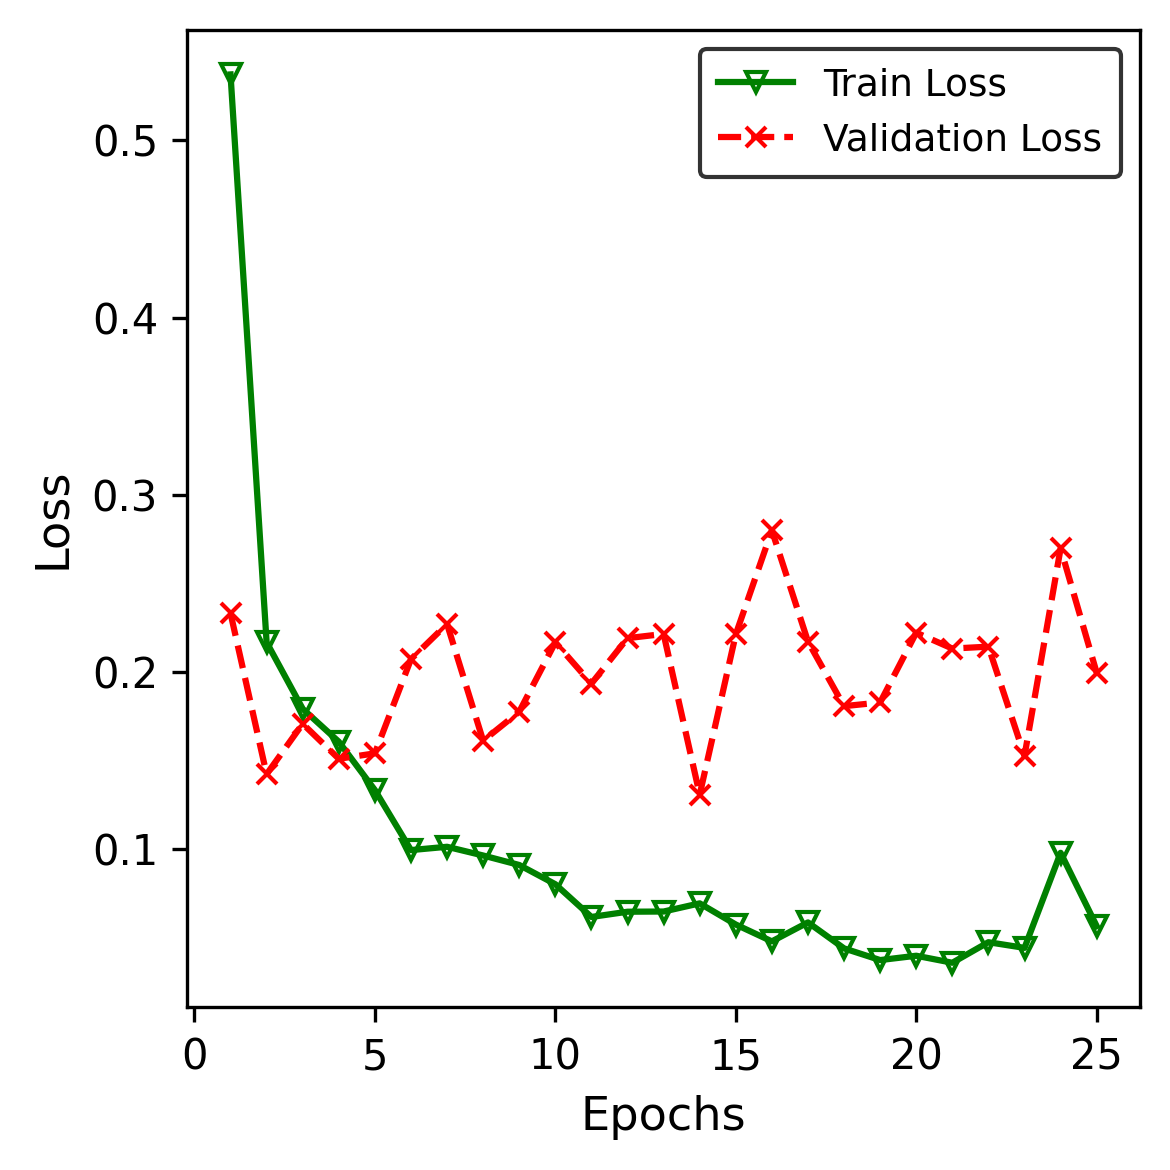

In [ ]:
#PRINTS THE DECREASE OF LOSS

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-2/figures/2-loss.png")

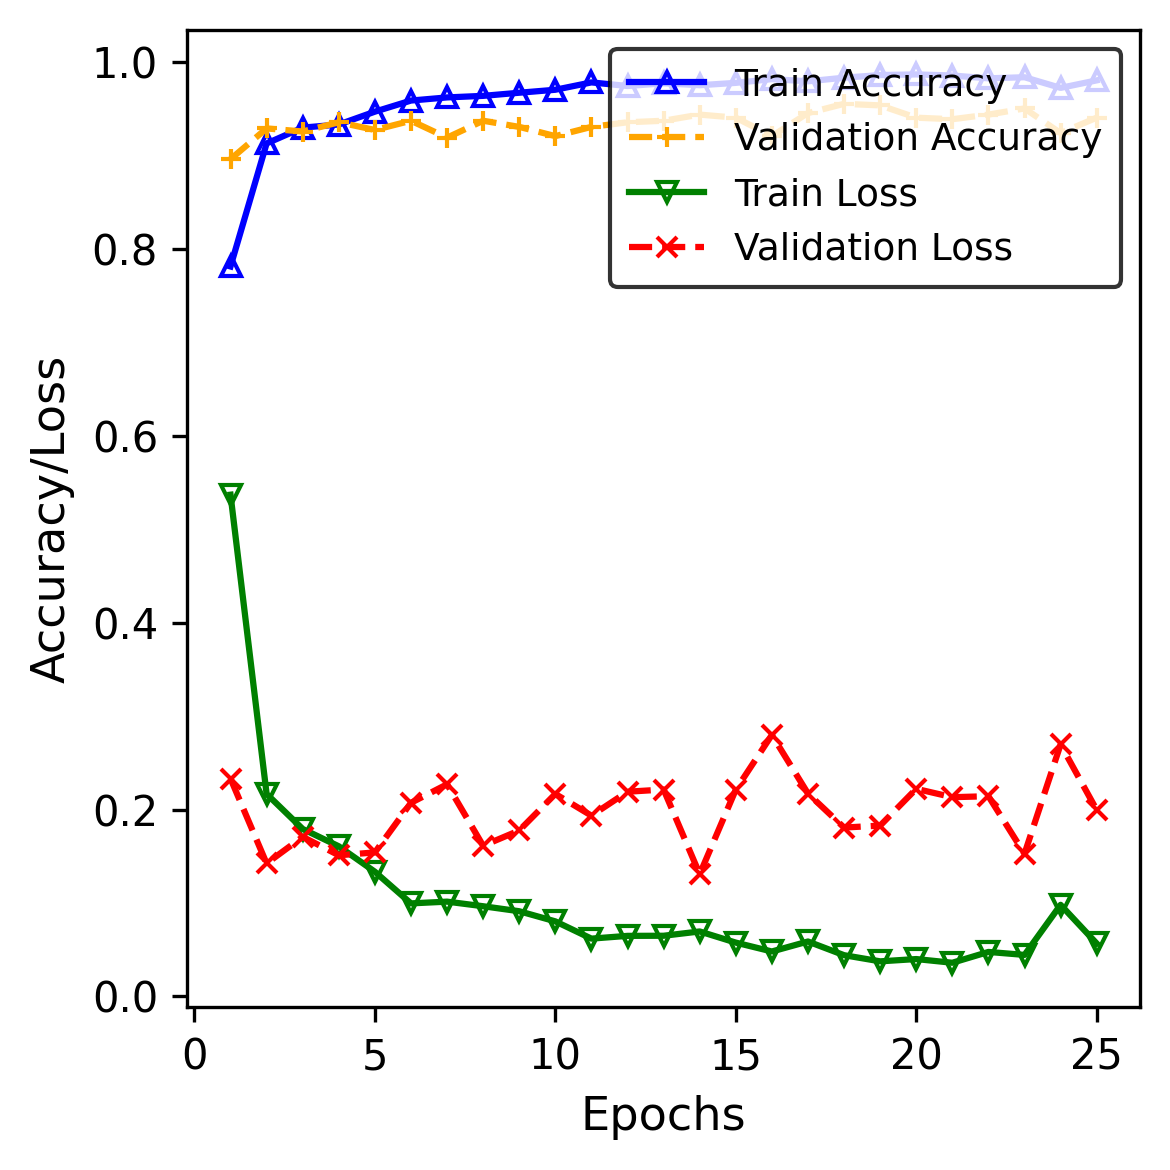

In [ ]:
#PRINTS BOTH ACCURACY AND LOSS IN ONE GRAPH

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-2/figures/3-convergence.png")

In [ ]:
# Test Results

#evaluate accuracy
test_pred = model.predict(test_generator,
                                 nb_test_samples/batch_size, workers=1)

test_accuracy = accuracy_score(test_labels, test_pred.argmax(axis=-1))
print('The accuracy of the model is: ', test_accuracy)

#evaluate mean squared error
test_mse = mean_squared_error(test_labels, test_pred.argmax(axis=-1))
print('The Mean Squared Error of the model is: ', test_mse)

#evaluate mean squared log error
test_msle = mean_squared_log_error(test_labels, test_pred.argmax(axis=-1))
print('The Mean Squared Log Error of the model is: ', test_msle)

10/10 [==============================] - 149s 15s/step
The accuracy of the model is:  0.9646302250803859
The Mean Squared Error of the model is:  0.04501607717041801
The Mean Squared Log Error of the model is:  0.019329514790979406


               precision    recall  f1-score   support

       0_Rust     0.9420    0.9774    0.9594       133
1_Brown_Spots     0.9639    0.9195    0.9412        87
2_Sooty_Molds     1.0000    0.9890    0.9945        91

     accuracy                         0.9646       311
    macro avg     0.9686    0.9620    0.9650       311
 weighted avg     0.9651    0.9646    0.9646       311

Confusion matrix, without normalization
[[130   3   0]
 [  7  80   0]
 [  1   0  90]]


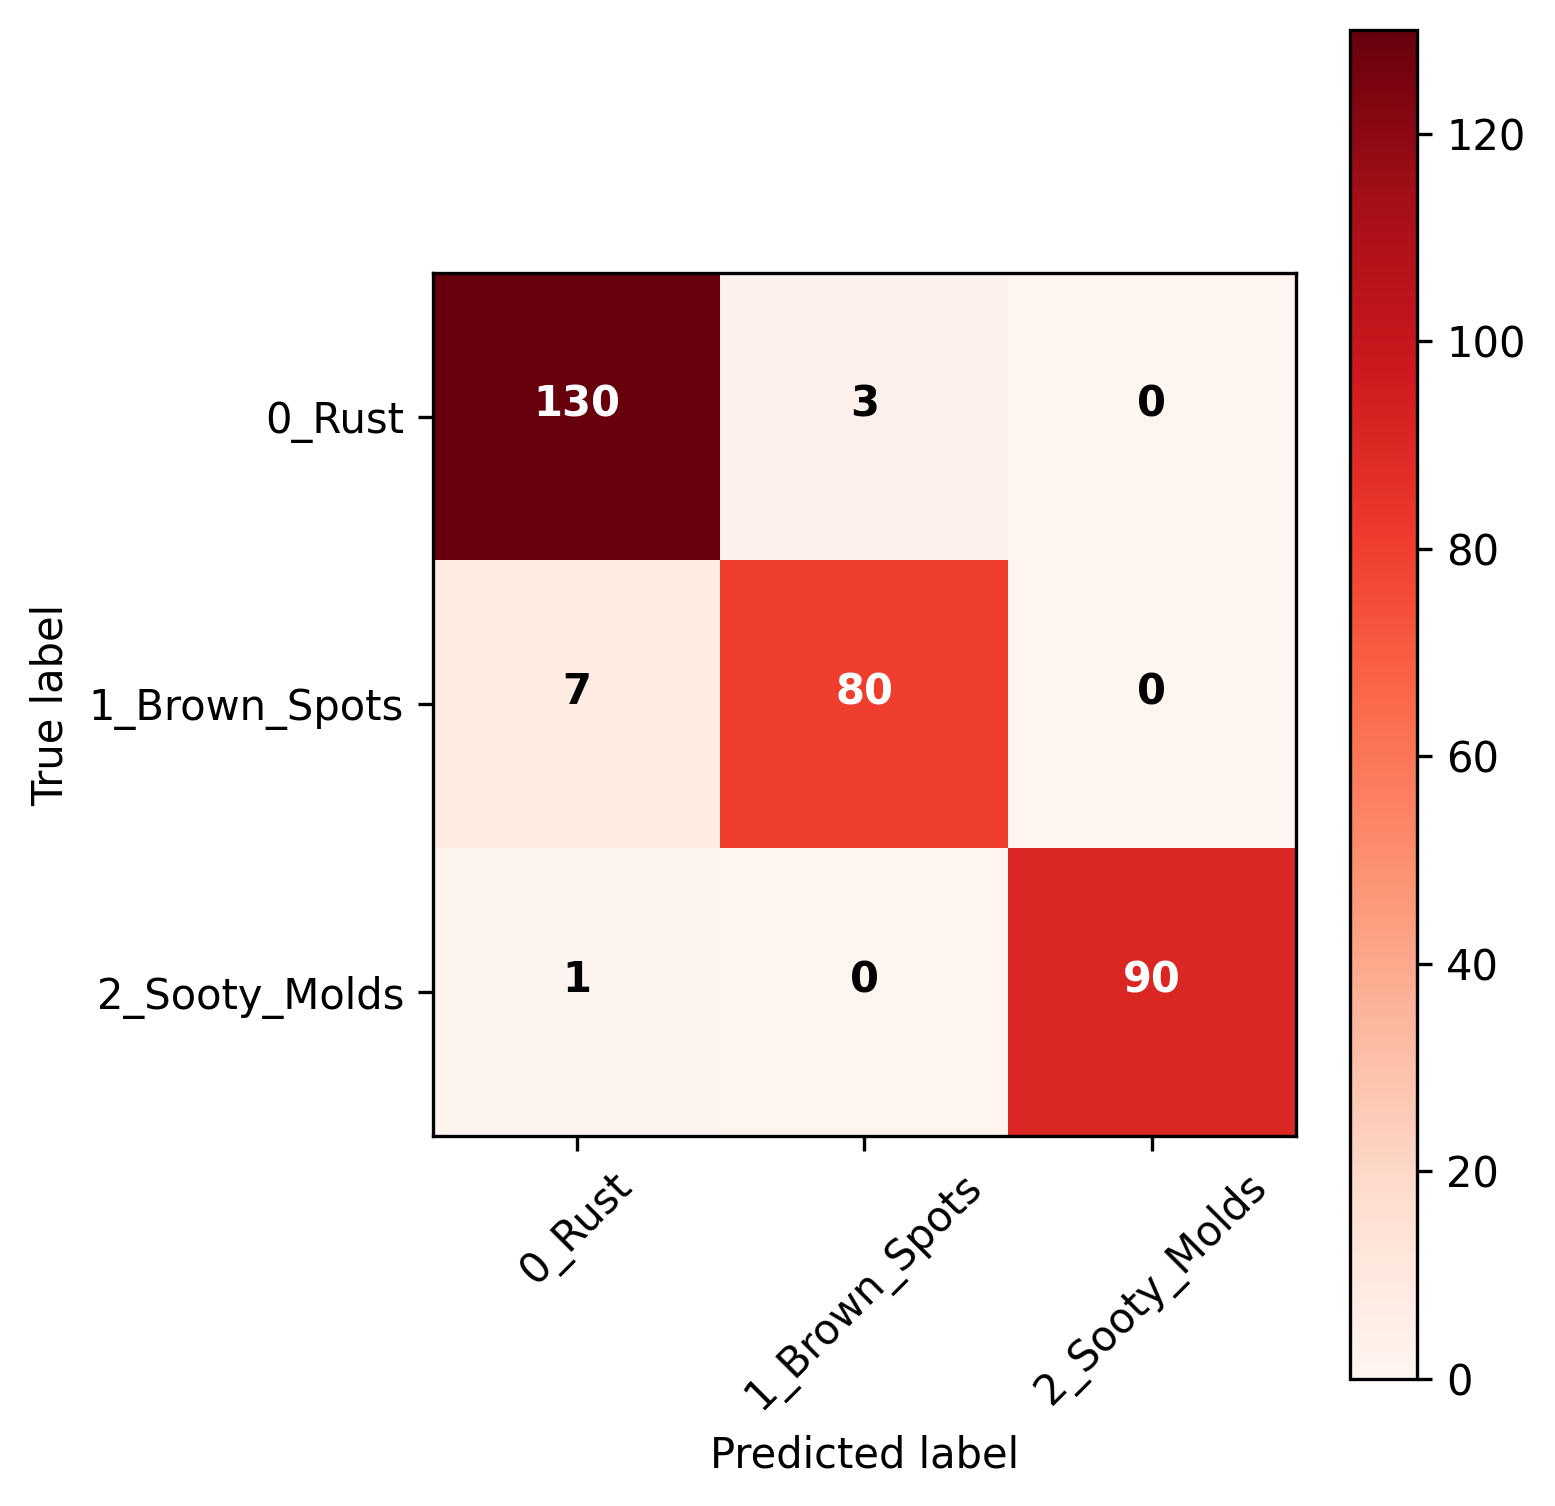

In [ ]:
# CONFUSION MATRIX

def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['0_Rust', '1_Brown_Spots','2_Sooty_Molds']
print(classification_report(test_labels,test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-2/confusion_matrix.png", dpi=600)
plt.show()

               precision    recall  f1-score   support

       0_Rust     0.9420    0.9774    0.9594       133
1_Brown_Spots     0.9639    0.9195    0.9412        87
2_Sooty_Molds     1.0000    0.9890    0.9945        91

     accuracy                         0.9646       311
    macro avg     0.9686    0.9620    0.9650       311
 weighted avg     0.9651    0.9646    0.9646       311

Normalized confusion matrix
[[0.9774 0.0226 0.    ]
 [0.0805 0.9195 0.    ]
 [0.011  0.     0.989 ]]


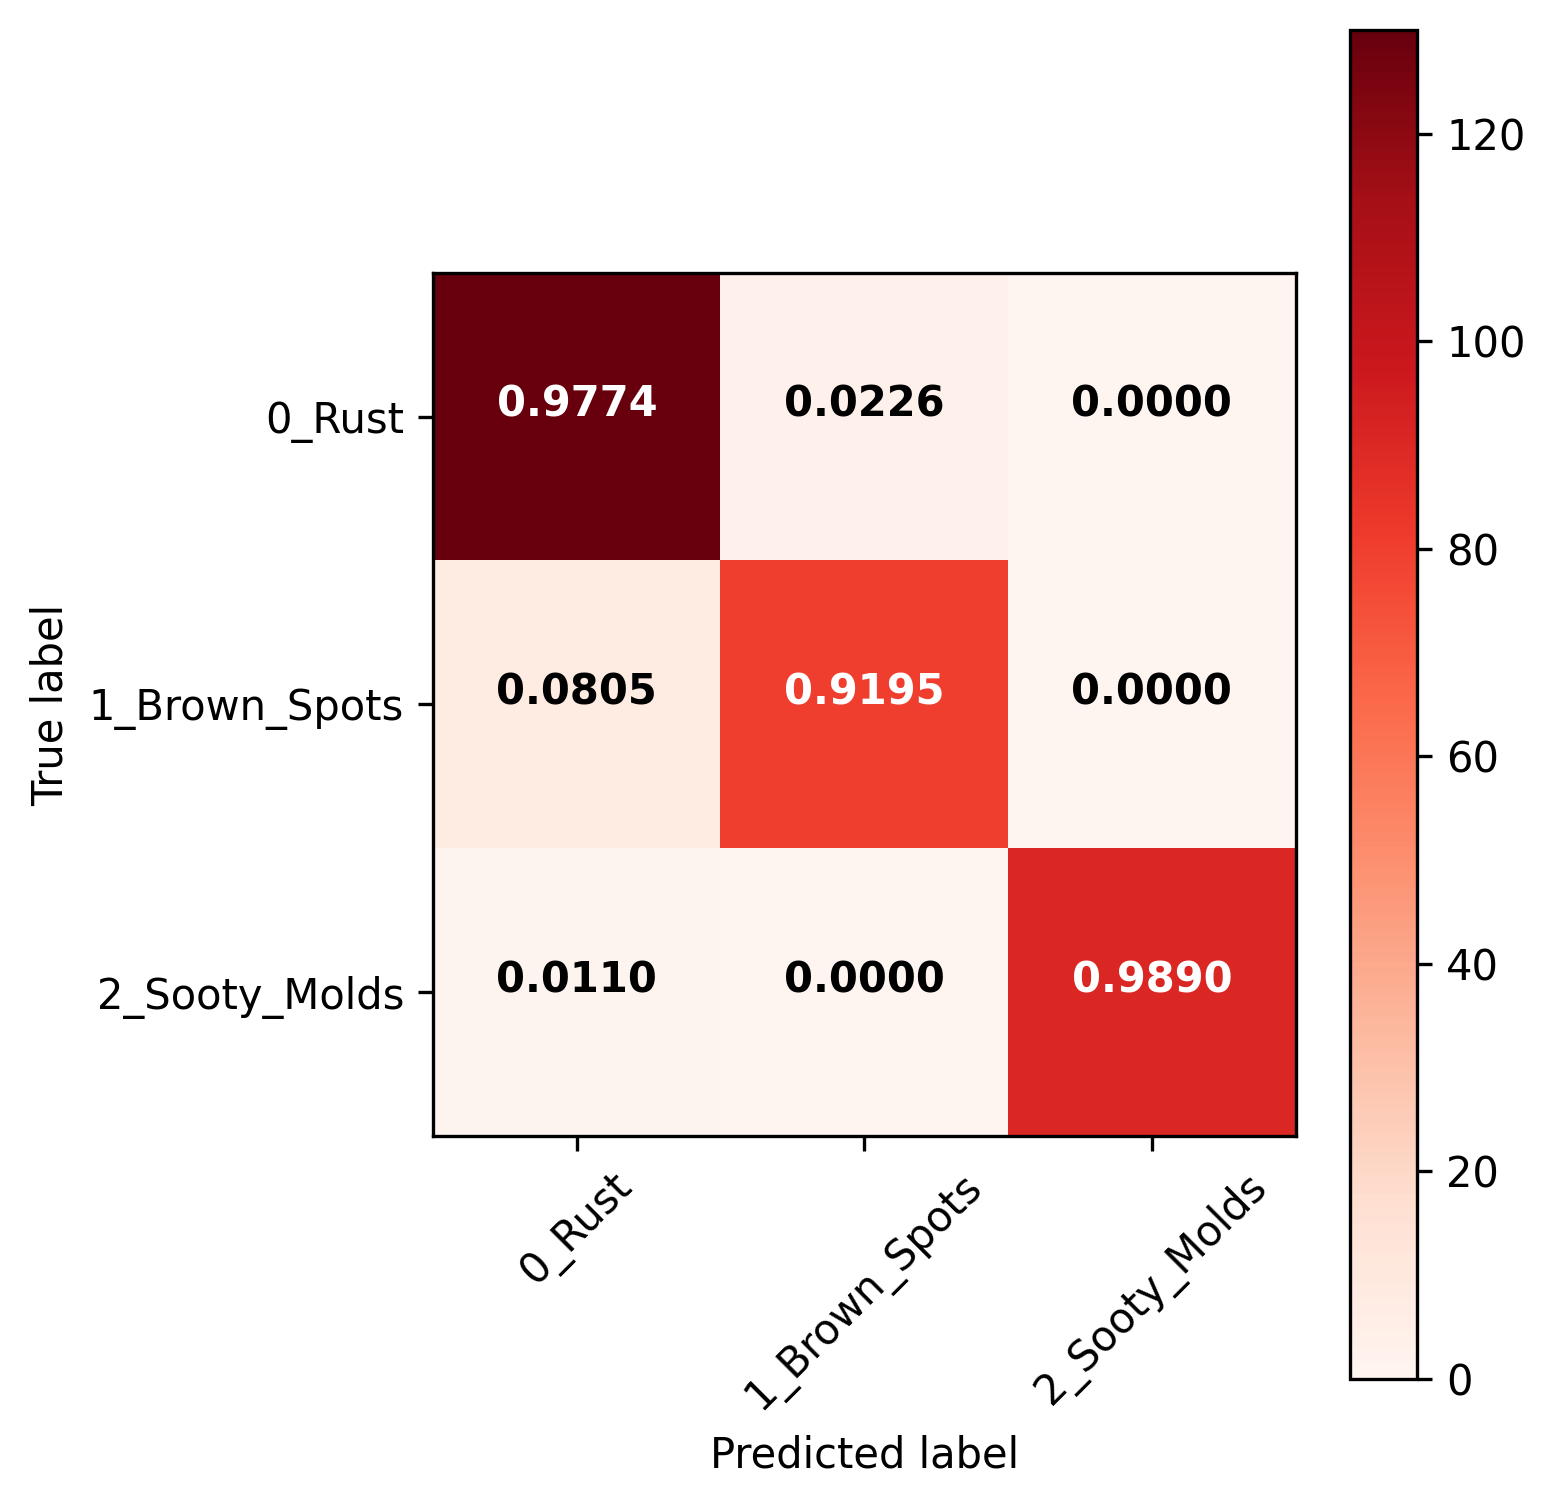

In [ ]:
# custom function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.4f'), weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['0_Rust', '1_Brown_Spots','2_Sooty_Molds']
print(classification_report(test_labels,test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-2/confusion_matrix-normalized.png", dpi=600)
plt.show()

10/10 [==============================] - 145s 14s/step


<Figure size 2400x2400 with 0 Axes>

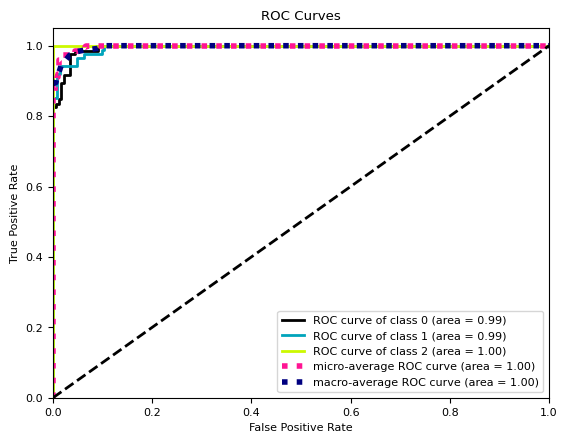

In [ ]:
#PRINT THE ROC CURVE

plt.figure(figsize=(8,8), dpi=300)
plt.rcParams.update({'font.size': 8})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_roc(test_labels, test_pred)
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-2/ROC_curve.png", dpi=600)
plt.show()

10/10 [==============================] - 151s 15s/step


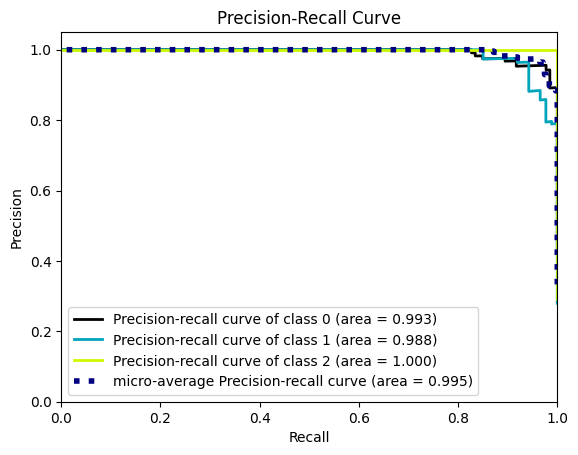

<Figure size 6000x6000 with 0 Axes>

In [ ]:
#PRINT THE P-R CURVE

plt.rcParams.update({'font.size': 10})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_precision_recall(test_labels, test_pred)
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-2/PR_curve.png", dpi=600)
plt.figure(figsize=(20, 20), dpi=300)
plt.show()

stage-3

In [ ]:
#LOAD THE DATA
#LOAD THE DATA
train_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/stage_3/train"
validation_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/stage_3/validation"
test_data_dir = "/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/test/stage-3/test"


# THE INPUT LAYER IS THE SAME AS IT WILL BE FUSED AS ONE LATER ON
img_rows, img_cols = 224, 224
input_shape = (img_rows,img_cols,3)
model_input = Input(shape=input_shape)
print("Data folders found!")
print("The Input size is set to ", model_input)

Data folders found!
The Input size is set to  KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [ ]:

#DATA GENERATORS
val_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['0_Cercospora', '1_Phoma', '2_Leaf_Miner','3_Red_Spider_Mite'])

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['0_Cercospora', '1_Phoma', '2_Leaf_Miner','3_Red_Spider_Mite'])

#CHECK  THE NUMBER OF SAMPLES
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)

print("Validation samples:", nb_validation_samples)
print("Test samples:", nb_test_samples)

if nb_validation_samples == 0:
    print("NO DATA VALIDATION FOUND! Please check your validation data path and folders!")
    print("Check the data folders first!")
else:
    print("Validation samples found!")

if nb_test_samples == 0:
    print("NO DATA TEST FOUND! Please check your test data path and folders!")
    print("Check the data folders first!")
else:
    print("Test samples found!")

#check the class indices
validation_generator.class_indices
test_generator.class_indices

#true labels
Y_test=validation_generator.classes
test_labels = test_generator.classes

num_classes= len(validation_generator.class_indices)

print('Model set to train', num_classes, 'classes')

if nb_validation_samples and nb_test_samples > 0:
    print("Generators are set!")
    print("Check if dataset is complete and has no problems before proceeding.")

Found 177 images belonging to 4 classes.
Found 87 images belonging to 4 classes.
Validation samples: 177
Test samples: 87
Validation samples found!
Test samples found!
Model set to train 4 classes
Generators are set!
Check if dataset is complete and has no problems before proceeding.


In [ ]:
#LOAD THE TRAINED MODEL

model = load_model("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/stage-3/weights/resnet50v2_model.h5")
print("resnet50v2 INITIALIZED!")
print("The model consist of ", len(model.layers), "layers")

resnet50v2 INITIALIZED!
The model consist of  388 layers


In [ ]:
#LOAD THE TRAINED MODEL USING  THE model_trainer.ipynb

history = pickle.load(open('/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/stage-3/history/resnet50v2_model.pkl', 'rb'))
model = load_model('/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/stage-3/weights/resnet50v2_model.h5')
model._name="resnet50v2"
model.summary()

if len(model.layers) == 388 :
    print("MODEL IS READY!")
elif len(model.layers) != 388 :
    print("INCORRECT MODEL!")

print("resnet50v2 MODEL SUCCESSFULLY LOADED!")

In [ ]:
#VISUAL CUSTOMIZER

marker_t = '^'
marker_v = '+'
market_t_loss = 'v'
market_v_loss = 'x'
markersize = 5
fillstyle_t = 'none'
fillstyle_v = 'none'

color_t = 'blue'
color_v = 'orange'

labelsize = 10

color_t_loss = 'green'
color_v_loss = 'red'

border_pad = 0.5
legend_font_size = 9

ls_t = '-'
ls_v = '--'
lw_t = '1.5'
lw_v = '1.5'

print("You may change the values if needed for the ease of your evaluation")

You may change the values if needed for the ease of your evaluation


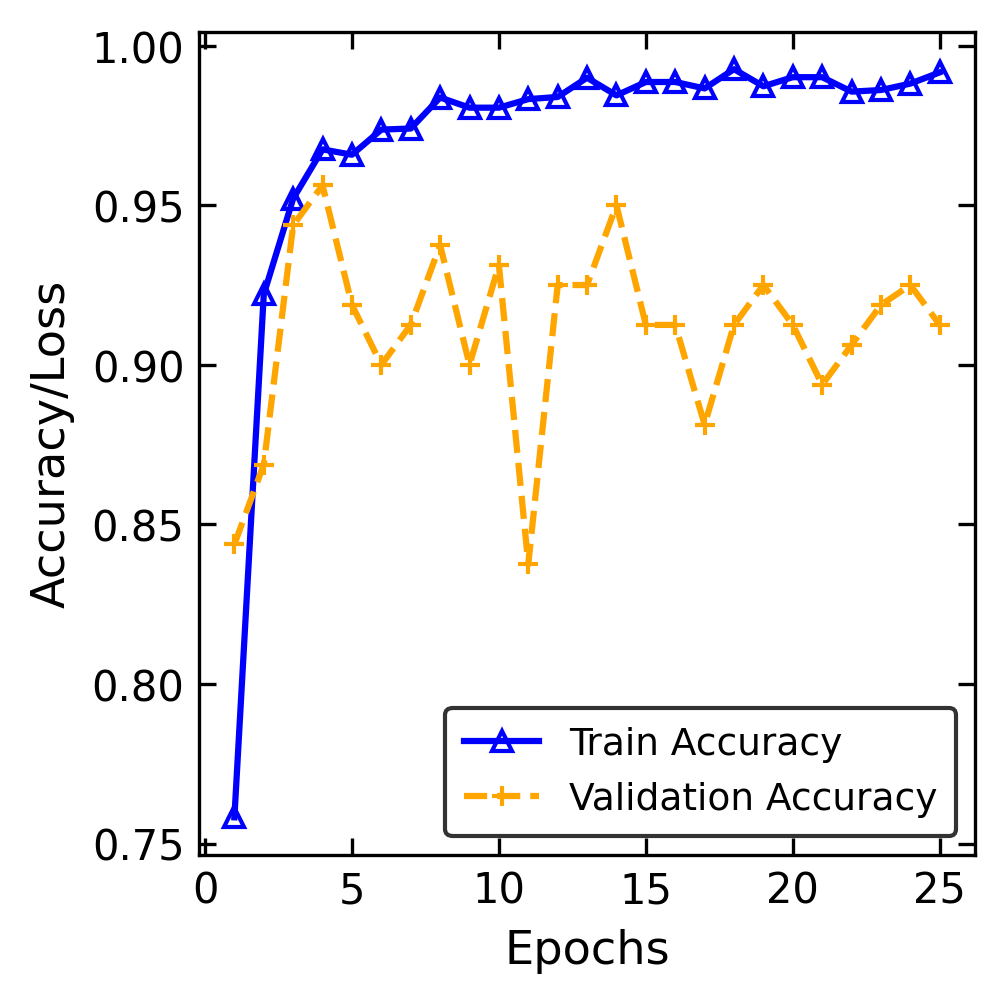

In [ ]:
#PRINTS THE ACCURACY GROWTH

N = epochs
plt.style.use("default")
plt.figure(figsize=(1.15*3,1.15*3), dpi=300, edgecolor='black', facecolor='white', linewidth=0)
plt.tight_layout()

plt.gcf().subplots_adjust(bottom=0.15)

plt.rc('xtick',labelsize=labelsize, direction="in" )
plt.rc('ytick', labelsize=labelsize, direction="in")
plt.tick_params(length=4, right=True, top=True)

plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="lower right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-3/figures/1-accuracy.jpg", bbox_inches='tight', dpi=600)

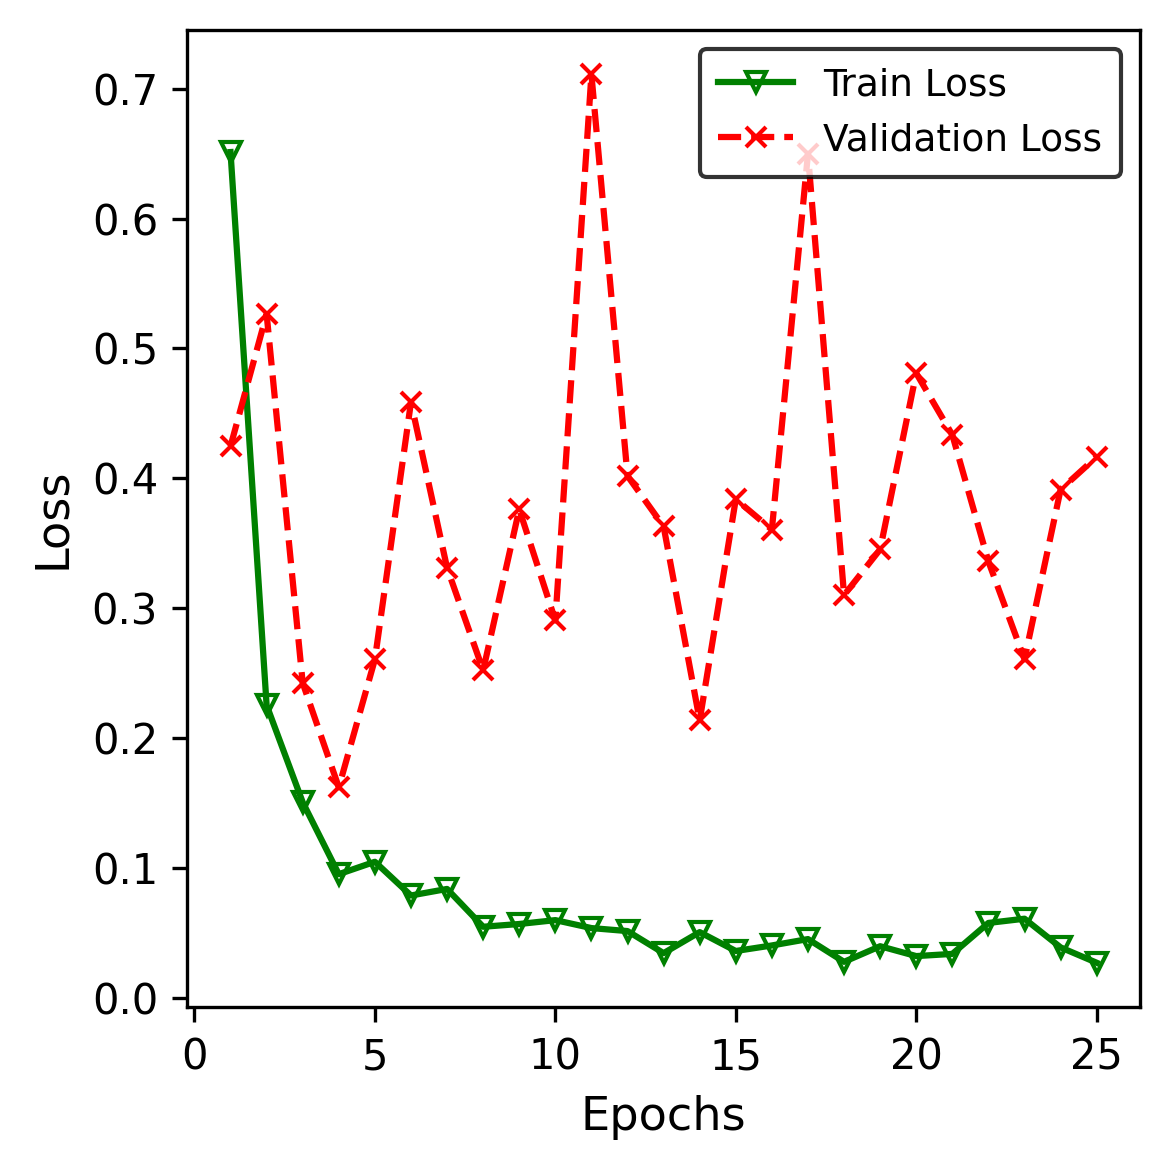

In [ ]:
#PRINTS THE DECREASE OF LOSS

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-3/figures/2-loss.png")

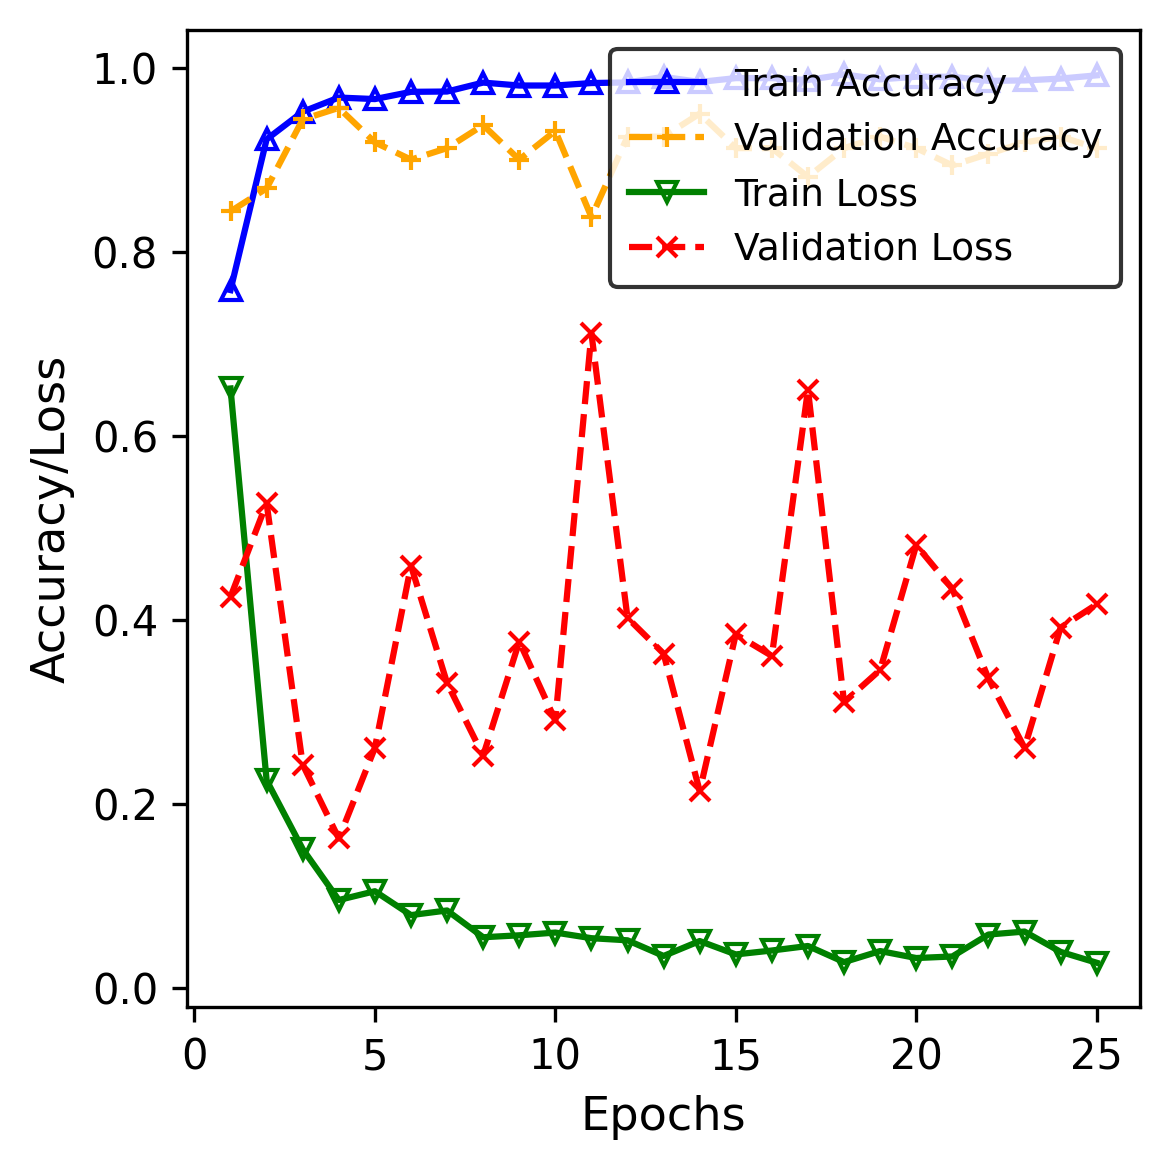

In [ ]:
#PRINTS BOTH ACCURACY AND LOSS IN ONE GRAPH

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Coffee leaf Datasets/swatdcnn/data/Augmented/comparisons/ResNet50v2/Figures/stage-3/figures/3-convergence.png")

In [ ]:
# Test Results

#evaluate accuracy
test_pred = model.predict(test_generator,
                                 nb_test_samples/batch_size, workers=1)

test_accuracy = accuracy_score(test_labels, test_pred.argmax(axis=-1))
print('The accuracy of the model is: ', test_accuracy)

#evaluate mean squared error
test_mse = mean_squared_error(test_labels, test_pred.argmax(axis=-1))
print('The Mean Squared Error of the model is: ', test_mse)

#evaluate mean squared log error
test_msle = mean_squared_log_error(test_labels, test_pred.argmax(axis=-1))
print('The Mean Squared Log Error of the model is: ', test_msle)

3/3 [==============================] - 53s 17s/step
The accuracy of the model is:  0.8850574712643678
The Mean Squared Error of the model is:  0.25287356321839083
The Mean Squared Log Error of the model is:  0.07046274283487763


                   precision    recall  f1-score   support

     0_Cercospora     1.0000    0.3750    0.5455         8
          1_Phoma     0.9118    0.9118    0.9118        34
     2_Leaf_Miner     0.8108    0.9375    0.8696        32
3_Red_Spider_Mite     1.0000    1.0000    1.0000        13

         accuracy                         0.8851        87
        macro avg     0.9306    0.8061    0.8317        87
     weighted avg     0.8959    0.8851    0.8757        87

Confusion matrix, without normalization
[[ 3  1  4  0]
 [ 0 31  3  0]
 [ 0  2 30  0]
 [ 0  0  0 13]]


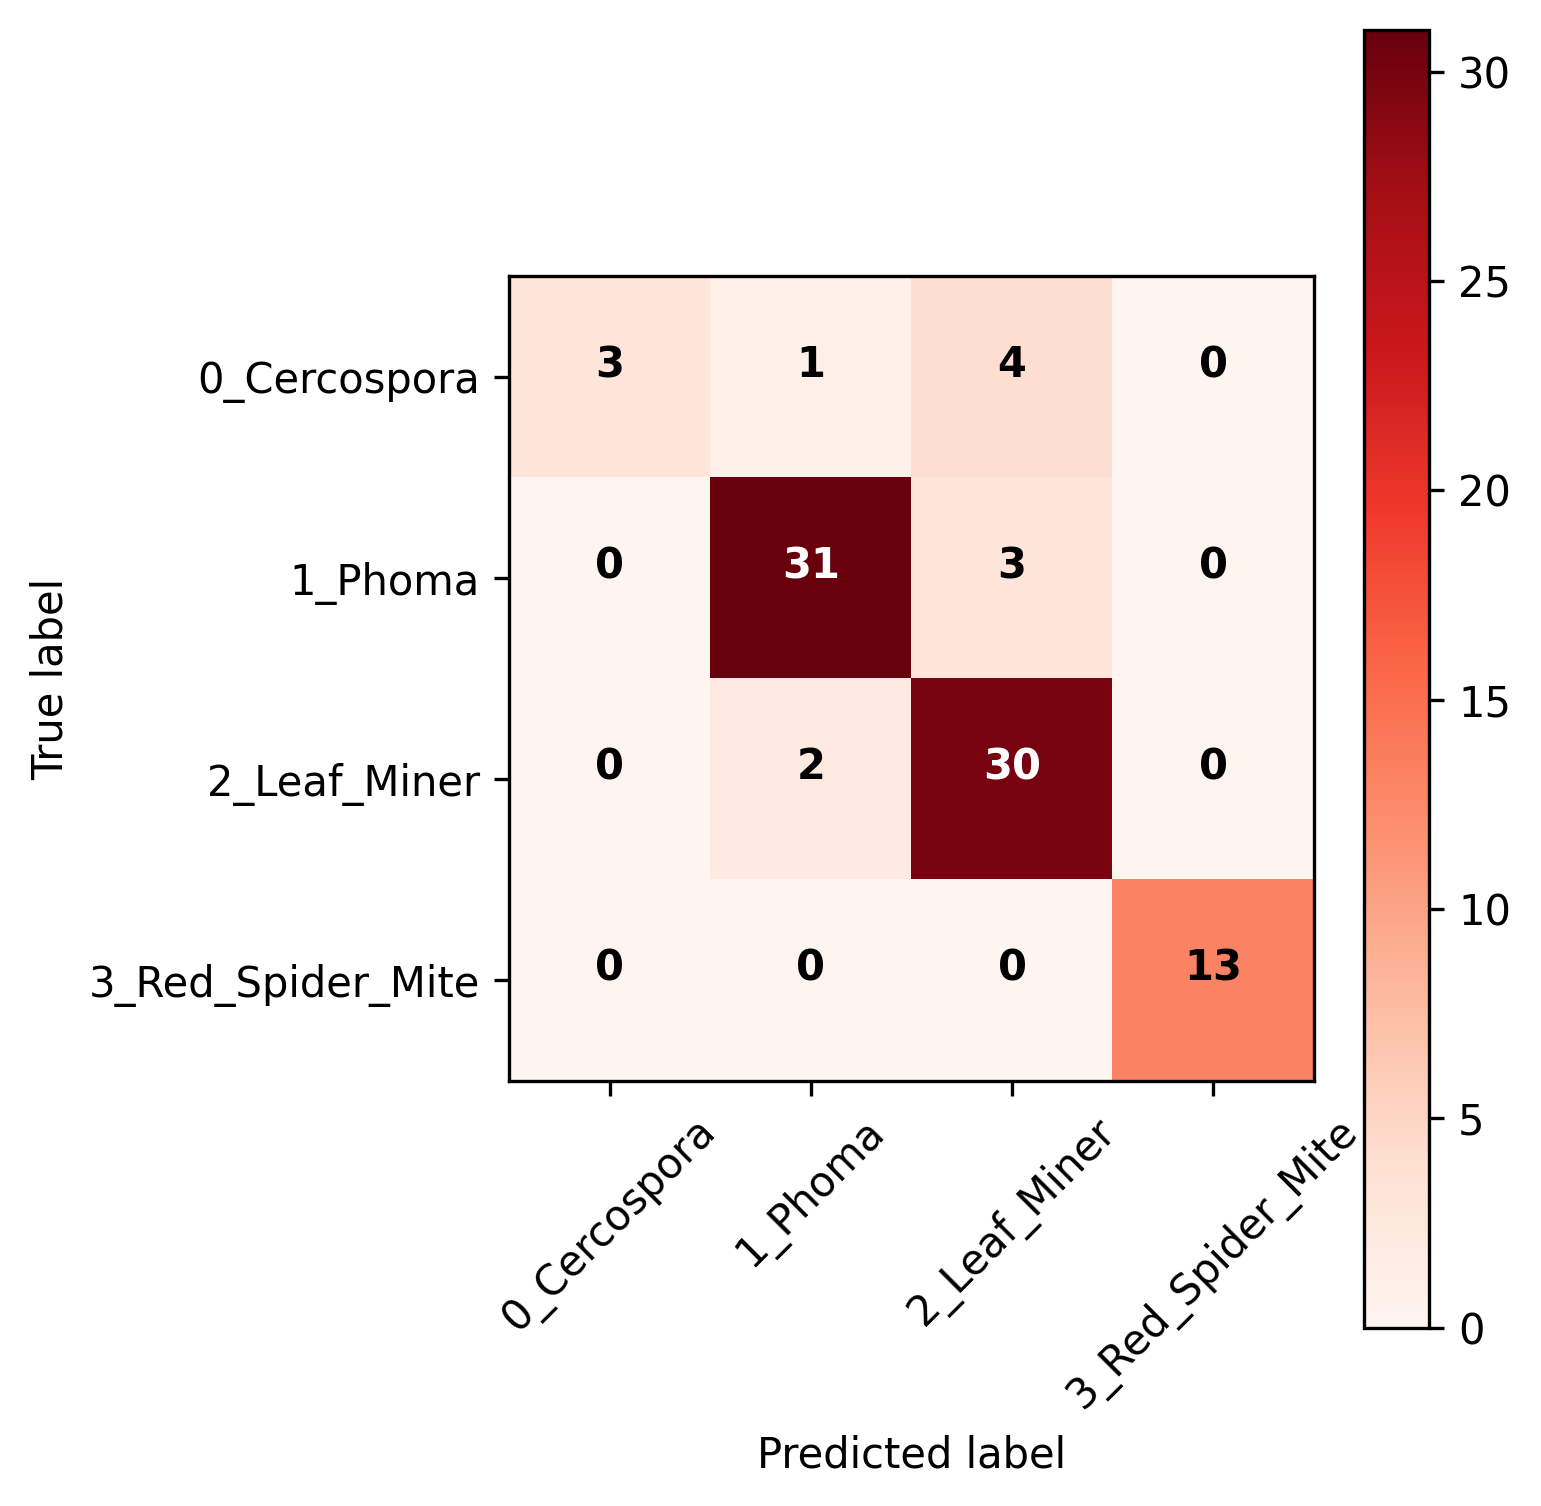

In [ ]:
# CONFUSION MATRIX

def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['0_Cercospora', '1_Phoma','2_Leaf_Miner','3_Red_Spider_Mite']
print(classification_report(test_labels,test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-3/confusion_matrix.png", dpi=600)
plt.show()

                   precision    recall  f1-score   support

     0_Cercospora     1.0000    0.3750    0.5455         8
          1_Phoma     0.9118    0.9118    0.9118        34
     2_Leaf_Miner     0.8108    0.9375    0.8696        32
3_Red_Spider_Mite     1.0000    1.0000    1.0000        13

         accuracy                         0.8851        87
        macro avg     0.9306    0.8061    0.8317        87
     weighted avg     0.8959    0.8851    0.8757        87

Normalized confusion matrix
[[0.375  0.125  0.5    0.    ]
 [0.     0.9118 0.0882 0.    ]
 [0.     0.0625 0.9375 0.    ]
 [0.     0.     0.     1.    ]]


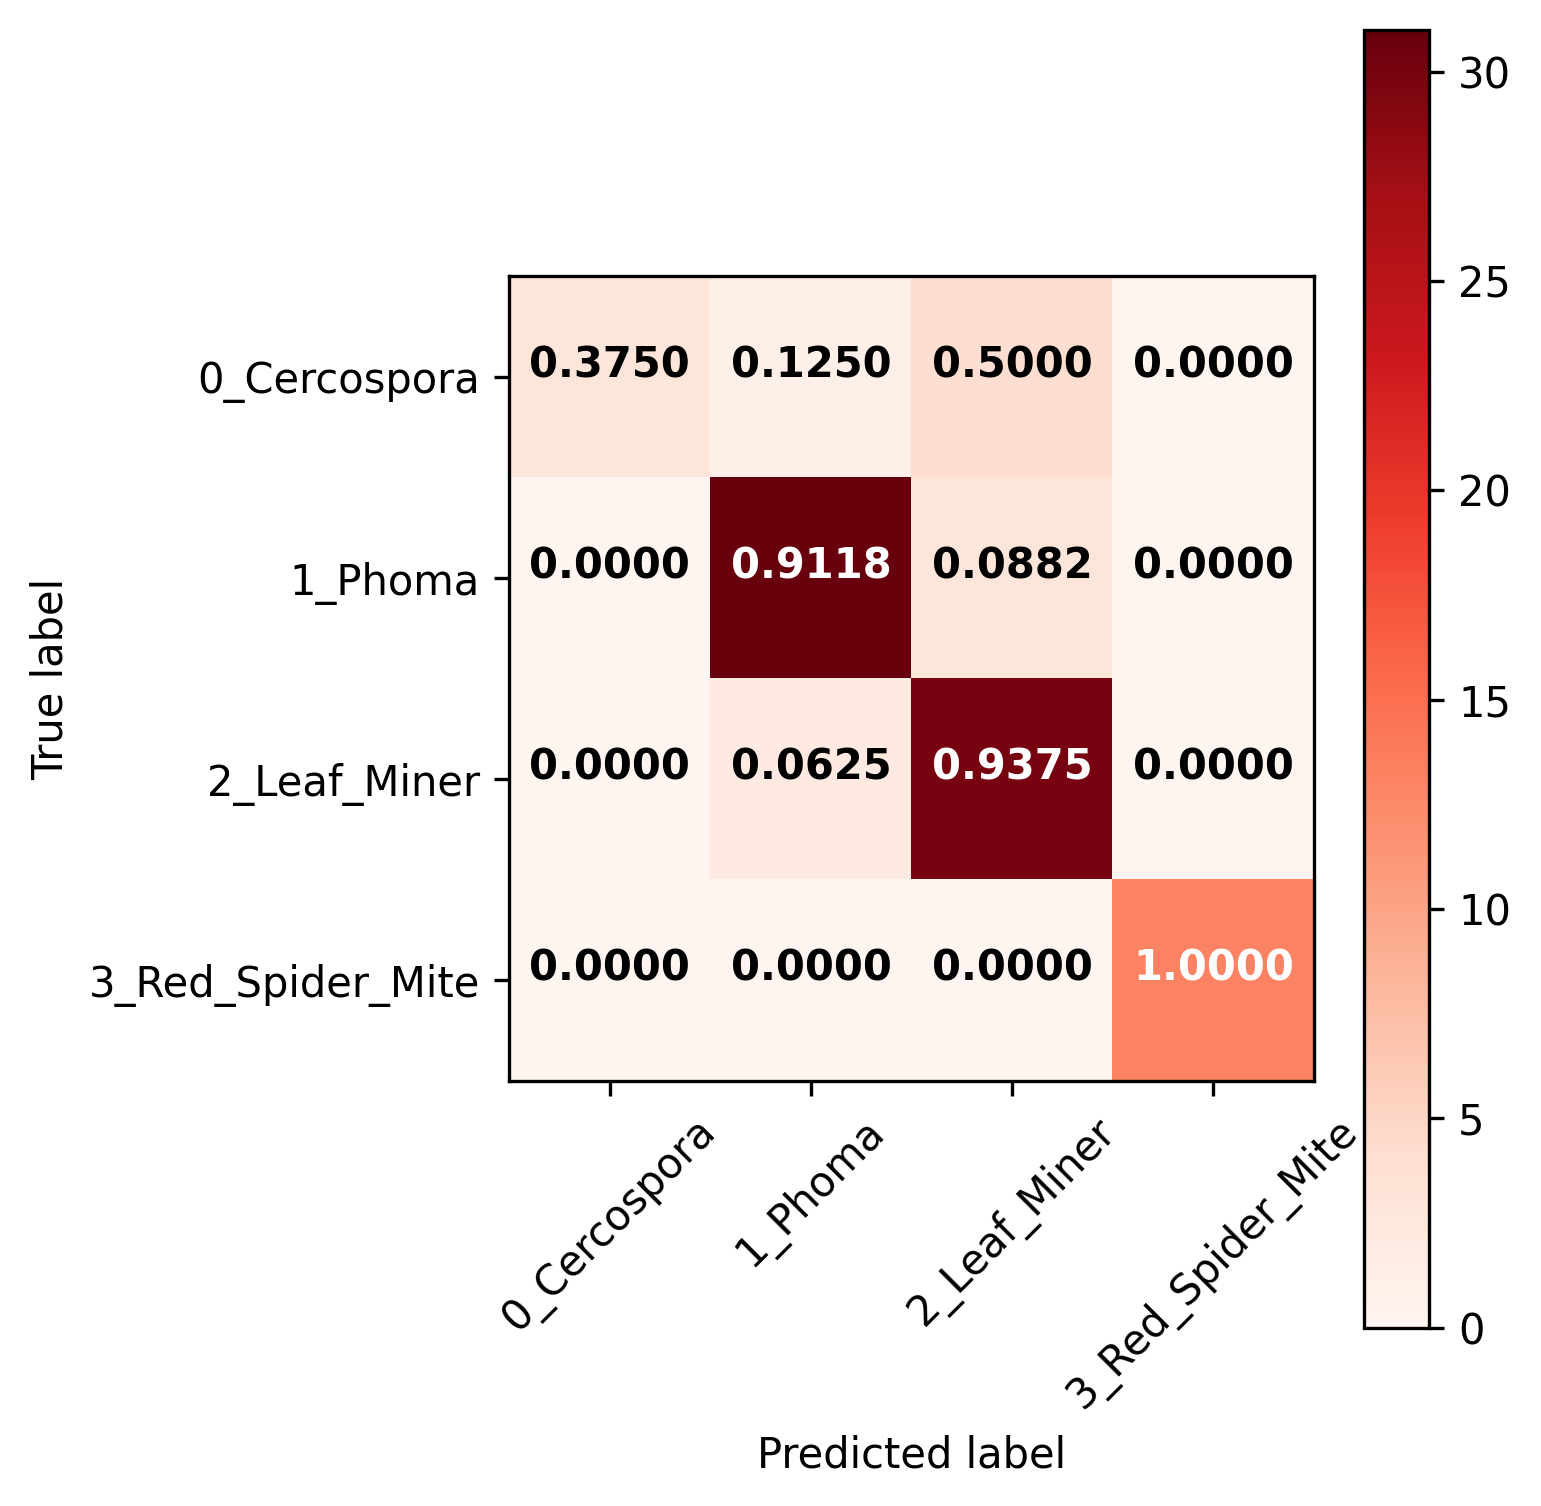

In [ ]:
# custom function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.4f'), weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['0_Cercospora', '1_Phoma','2_Leaf_Miner','3_Red_Spider_Mite']
print(classification_report(test_labels,test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-3/confusion_matrix-normalized.png", dpi=600)
plt.show()

3/3 [==============================] - 34s 10s/step


<Figure size 2400x2400 with 0 Axes>

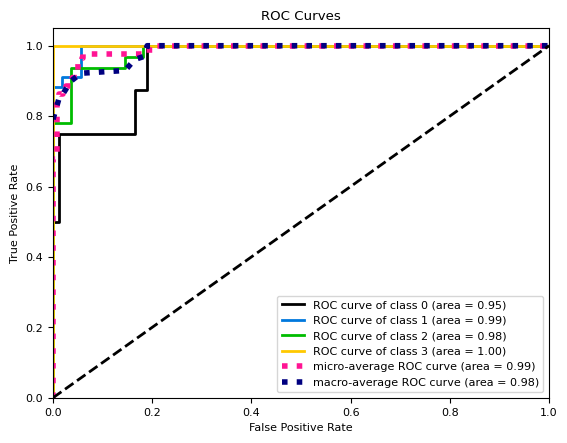

In [ ]:
#PRINT THE ROC CURVE

plt.figure(figsize=(8,8), dpi=300)
plt.rcParams.update({'font.size': 8})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_roc(test_labels, test_pred)
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-3/ROC_curve.png", dpi=600)
plt.show()

3/3 [==============================] - 32s 9s/step


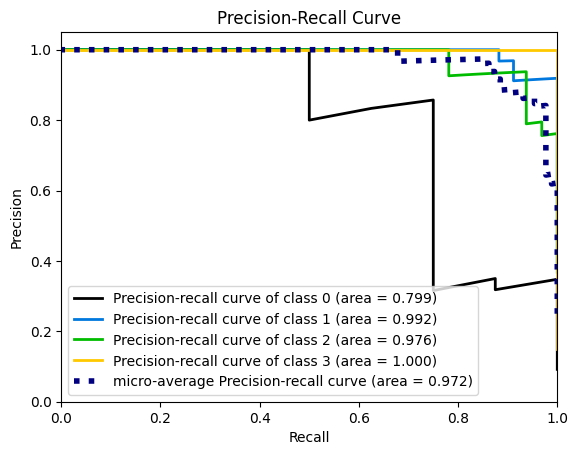

<Figure size 6000x6000 with 0 Axes>

In [ ]:
#PRINT THE P-R CURVE

plt.rcParams.update({'font.size': 10})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_precision_recall(test_labels, test_pred)
plt.savefig("/content/drive/MyDrive/Final_ figures/stage-3/PR_curve.png", dpi=600)
plt.figure(figsize=(20, 20), dpi=300)
plt.show()